In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\User\OneDrive\Documents\SQL\SQL project\APD Analysis\apd_calls.csv", 
              parse_dates=['response_datetime','first_unit_arrived_datetime','call_closed_datetime'], dayfirst=True)

In [3]:
pd.set_option('display.max_columns', None)

## What percentage of incidents required more than 3 units to be dispatched?

In [5]:
df.head(3)

,incident_number,incident_type,mental+health_flag,priority_level,response_datetime,response_day_of_week,response_hour,first_unit_arrived_datetime,call_closed_datetime,sector,initial_problem_description,intial_problem_category,final_problem_description,final_problem_category,number_of_units_arrived,unit_time_on_scene,call_disposition_description,report_writing_flag,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit-arrived_DOW3,first_unit_arrived_Hour,call_closed_DOW22,call_closed_Hour
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845300e+11,4.530409e+09,4.0,Mon,23,Tue,1
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-10-01 00:13:00,2024-10-01 00:18:00,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0,Tue,0,Tue,0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845300e+11,4.530434e+09,4.0,Mon,23,Tue,0


In [6]:
#more than 3 unit dispatched 
unit_gt_3= df[df['number_of_units_arrived']>3].shape[0]
#overall size of incident type
total_incident_type=df['final_problem_category'].shape[0]
#percentage of incident occurred
percentage_incident_gt_3= ((unit_gt_3)/(total_incident_type)) *100
#The final answer
print(f'The percentage of incidents that requires more than 3 units to be dispatched is {percentage_incident_gt_3: .2f}%')

The percentage of incidents that requires more than 3 units to be dispatched is  7.62%


## How do response times compare across different priorities for each type of incident?

In [8]:
df.head(3)

,incident_number,incident_type,mental+health_flag,priority_level,response_datetime,response_day_of_week,response_hour,first_unit_arrived_datetime,call_closed_datetime,sector,initial_problem_description,intial_problem_category,final_problem_description,final_problem_category,number_of_units_arrived,unit_time_on_scene,call_disposition_description,report_writing_flag,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit-arrived_DOW3,first_unit_arrived_Hour,call_closed_DOW22,call_closed_Hour
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845300e+11,4.530409e+09,4.0,Mon,23,Tue,1
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-10-01 00:13:00,2024-10-01 00:18:00,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0,Tue,0,Tue,0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845300e+11,4.530434e+09,4.0,Mon,23,Tue,0


## having issues 

In [10]:
# Getting piorities per avg response time mean
piority_avg_resp_time=df.groupby(['priority_level','final_problem_category'])['response_time'].describe()

#displaying all rows
pd.set_option('display.max_rows',None)

#displaying the value
piority_avg_resp_time.round(2)

# User input for priority level
user_priority = input("Enter priority level: ")

# Filtering and displaying results based on user input
if user_priority in piority_avg_resp_time.index.get_level_values(1):
    print(piority_avg_resp_time.loc[user_priority])
else:
    print("Priority level not found in the dataset.")

Enter priority level:  0


Priority level not found in the dataset.


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

## graphical representation

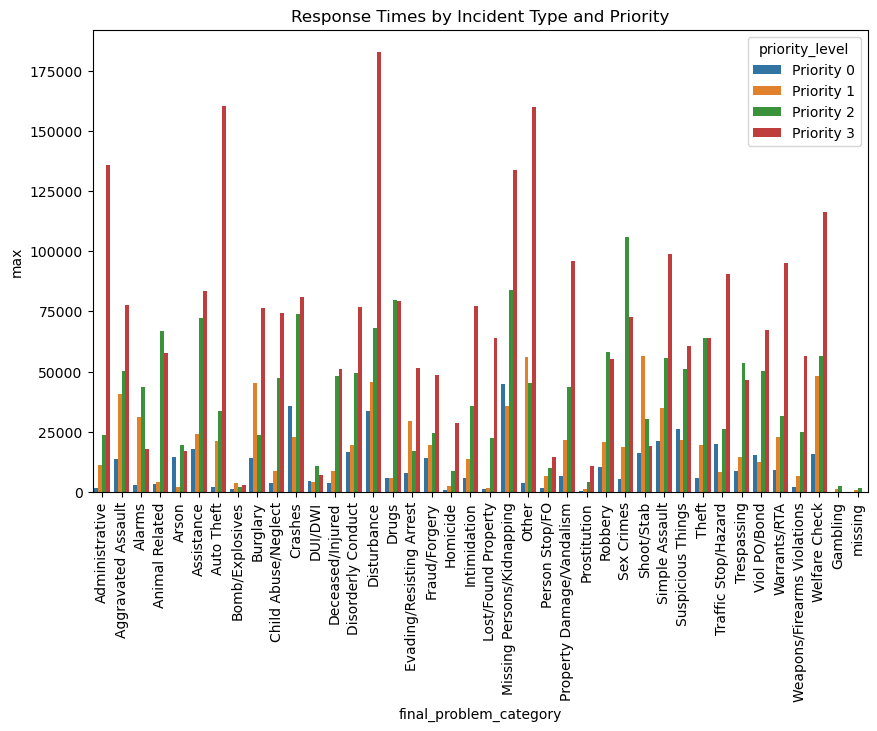

In [146]:
## --------------------------------------Code level display---------------------------------------------------------
piority_avg_resp_time=df.groupby(['priority_level','final_problem_category'])['response_time'].describe()

#displaying all rows
pd.set_option('display.max_rows',None)

#displaying the value (uncomment)
#piority_avg_resp_time.round(2).reset_index()         

## ----------------------------------------graphical portion (uncomment to show)----------------------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='final_problem_category', y='max', hue='priority_level', data=piority_avg_resp_time.reset_index())
plt.xticks(rotation=90)
plt.title('Response Times by Incident Type and Priority')
plt.show()


## Which geographic areas have the highest number of incidents involving officer injuries or fatalities?

In [41]:
df.head(3)

,incident_number,incident_type,mental+health_flag,priority_level,response_datetime,response_day_of_week,response_hour,first_unit_arrived_datetime,call_closed_datetime,sector,initial_problem_description,intial_problem_category,final_problem_description,final_problem_category,number_of_units_arrived,unit_time_on_scene,call_disposition_description,report_writing_flag,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit-arrived_DOW3,first_unit_arrived_Hour,call_closed_DOW22,call_closed_Hour
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845300e+11,4.530409e+09,4.0,Mon,23,Tue,1
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-10-01 00:13:00,2024-10-01 00:18:00,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0,Tue,0,Tue,0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845300e+11,4.530434e+09,4.0,Mon,23,Tue,0


In [43]:
#area with the highest number of injured officer
area_by_injured_officer=df.groupby(['geo_ID'])['officer_injured/killed_count'].sum().reset_index(name='officer_injured_sum')
area_by_injured_officer.sort_values(by='officer_injured_sum', ascending=False).head(1)

,geo_ID,officer_injured_sum
1,4.845300e+11,1.0


## Which council districts have the highest average response times?

In [46]:
df.head(3)

,incident_number,incident_type,mental+health_flag,priority_level,response_datetime,response_day_of_week,response_hour,first_unit_arrived_datetime,call_closed_datetime,sector,initial_problem_description,intial_problem_category,final_problem_description,final_problem_category,number_of_units_arrived,unit_time_on_scene,call_disposition_description,report_writing_flag,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit-arrived_DOW3,first_unit_arrived_Hour,call_closed_DOW22,call_closed_Hour
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845300e+11,4.530409e+09,4.0,Mon,23,Tue,1
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-10-01 00:13:00,2024-10-01 00:18:00,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0,Tue,0,Tue,0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845300e+11,4.530434e+09,4.0,Mon,23,Tue,0


In [48]:
#getting avg response time by council district
avg_rt_cd=df.groupby('council_district')['response_time'].mean().reset_index(name='avg_response_time').round(2)
#achievng the highest by sort range
avg_rt_cd.sort_values(by='avg_response_time', ascending=False).head(1)

,council_district,avg_response_time
1,1.0,2609.95


## How many incidents involve serious injury or death (either officers or subjects) related to mental health?

In [51]:
df.head(3)

,incident_number,incident_type,mental+health_flag,priority_level,response_datetime,response_day_of_week,response_hour,first_unit_arrived_datetime,call_closed_datetime,sector,initial_problem_description,intial_problem_category,final_problem_description,final_problem_category,number_of_units_arrived,unit_time_on_scene,call_disposition_description,report_writing_flag,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit-arrived_DOW3,first_unit_arrived_Hour,call_closed_DOW22,call_closed_Hour
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845300e+11,4.530409e+09,4.0,Mon,23,Tue,1
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-10-01 00:13:00,2024-10-01 00:18:00,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0,Tue,0,Tue,0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845300e+11,4.530434e+09,4.0,Mon,23,Tue,0


In [53]:
#getting health related 
mental_health_realated= df[df['mental+health_flag']=='Mental Health Incident']
#getting officer and subject count gt than zero
officer_subject_gt_zero=mental_health_realated[(mental_health_realated['officer_injured/killed_count']>0) | (mental_health_realated['subject_injured/killed_count']>0)]
#no of incident involving serious casualties
total_incident_with_OS_incident= officer_subject_gt_zero.shape[0]
#total_incident_with_OS_incident
print(f'The number of incidents that involve serious injury or death (either officers or subjects) related to mental health is: {total_incident_with_OS_incident}')

The number of incidents that involve serious injury or death (either officers or subjects) related to mental health is: 4


## How do incidents involving officer injuries correlate with mental health-related flags, and which sectors have the highest occurrence of these incidents?

In [62]:
df.head(3)

,incident_number,incident_type,mental+health_flag,priority_level,response_datetime,response_day_of_week,response_hour,first_unit_arrived_datetime,call_closed_datetime,sector,initial_problem_description,intial_problem_category,final_problem_description,final_problem_category,number_of_units_arrived,unit_time_on_scene,call_disposition_description,report_writing_flag,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit-arrived_DOW3,first_unit_arrived_Hour,call_closed_DOW22,call_closed_Hour
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,Prowler Hs,Suspicious Things,Prowler Hs,Suspicious Things,2,9989.0,No Report,No,222.0,0.0,0.0,0.0,4.845300e+11,4.530409e+09,4.0,Mon,23,Tue,1
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-10-01 00:13:00,2024-10-01 00:18:00,David,Suspicious Vehicle,Suspicious Things,Suspicious Vehicle,Suspicious Things,2,611.0,No Report,No,1327.0,0.0,0.0,0.0,4.845300e+11,4.530013e+09,3.0,Tue,0,Tue,0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,Alarm Burglar,Alarms,Alarm Burglar,Alarms,1,3112.0,False Alarm,No,243.0,0.0,0.0,0.0,4.845300e+11,4.530434e+09,4.0,Mon,23,Tue,0


In [144]:
# Getting overall incident by officer killed or injured
incident_by_officer=df.groupby(['sector', 'final_problem_category'])['officer_injured/killed_count'].sum().reset_index(name='officers_injured_all')
#incident_by_officer_injured=incident_by_officer[incident_by_officer['officers_injured']>0]

#mental health related incidents
mental_health_related_flags= df[df['mental+health_flag']=='Mental Health Incident']
#Getting officer killed count that are mental health related
incident_by_officer_MHR=mental_health_related_flags.groupby('final_problem_category')['officer_injured/killed_count'].sum().reset_index(name='officers_injured_MHR')

#merging both incident_by_officer and incident_by_officer_MHR
incident_merging= incident_by_officer.merge(incident_by_officer_MHR, on='final_problem_category')

#correlating incidents involving officer injuries with mental health-related flags
incident_correlation= incident_merging['officers_injured_all'].corr(incident_merging['officers_injured_MHR'])

#print(f'The correlation between incidents involving officer injuries and mental health-related flags is: {incident_correlation}')

#sector with the highest occurence of the incidents
sector_with_highest_occurence= incident_merging.groupby('sector').max()

##sector with the highest occurence of the incidents above zero
sector=sector_with_highest_occurence[(sector_with_highest_occurence['officers_injured_all']==1) & (sector_with_highest_occurence['officers_injured_MHR']==1)].reset_index()
#locating only sector columns
sector_needed= sector.iloc[ : , 0]
#sector with highest occurence into dataframe
sector_with_highest_occurence= pd.DataFrame(sector_needed)
sector_with_highest_occurence

,sector
0,Baker
